In [1]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.cm as cm

In [2]:
%config IPCompleter.greedy=True

In [3]:
df = pd.read_csv('~/MasterThesis/Data/iris.csv')

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**Encode String Attribute to Integer**

In [5]:
enc = LabelEncoder()
enc.fit(df['species'])
df['species']= enc.transform(df['species'])

**Principal Component Analysis for Dimentionality Reduction**

In [6]:
pca = PCA(n_components=3)
pca.fit(df)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [7]:
df_3d=pca.transform(df)

In [8]:
df_3d

array([[-2.86550669e+00,  3.02780442e-01,  4.84897211e-02],
       [-2.89321339e+00, -1.76987146e-01, -1.68798182e-01],
       [-3.05574910e+00, -1.68006289e-01,  5.65424149e-02],
       [-2.92124902e+00, -3.25027211e-01,  9.80010810e-03],
       [-2.90675140e+00,  3.02332724e-01,  1.53720302e-01],
       [-2.48899988e+00,  7.39727187e-01,  2.00679240e-01],
       [-2.99106535e+00, -1.16739834e-01,  2.50385821e-01],
       [-2.81105291e+00,  1.55635814e-01,  1.66268489e-02],
       [-3.05248032e+00, -5.89687583e-01, -9.28733240e-03],
       [-2.85470148e+00, -1.11633294e-01, -1.64955858e-01],
       [-2.70085679e+00,  6.36298840e-01,  2.34535897e-02],
       [-2.79784383e+00,  8.04346801e-03,  8.99945580e-02],
       [-2.96034027e+00, -2.39025333e-01, -1.67059861e-01],
       [-3.36757216e+00, -5.53686579e-01,  9.81963025e-02],
       [-2.83079955e+00,  1.14659075e+00,  7.49186344e-02],
       [-2.58796715e+00,  1.30810539e+00,  4.03602440e-01],
       [-2.80918503e+00,  7.79232365e-01

In [9]:
X = df_3d

**Elbow Implimentation with Silhouette Score**

For n_clusters = 2 The average silhouette_score is : 0.6914512512452402


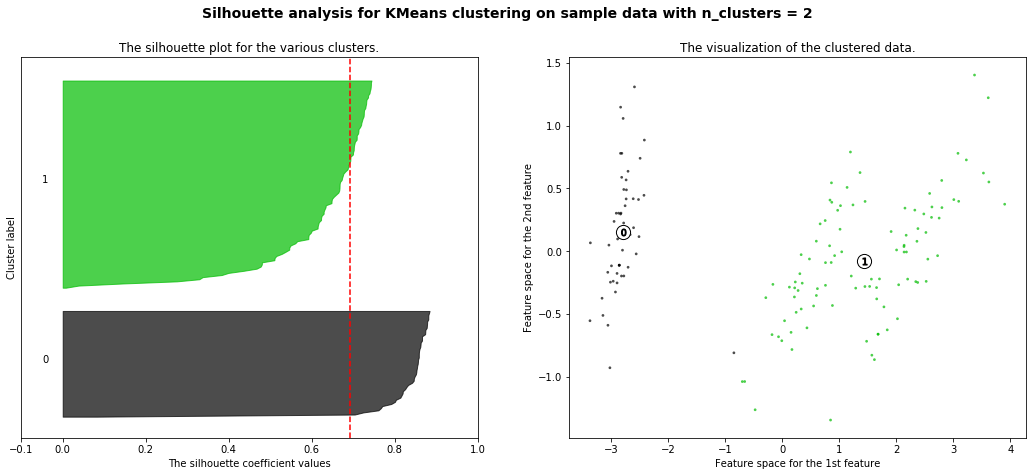

For n_clusters = 3 The average silhouette_score is : 0.5943543745049942


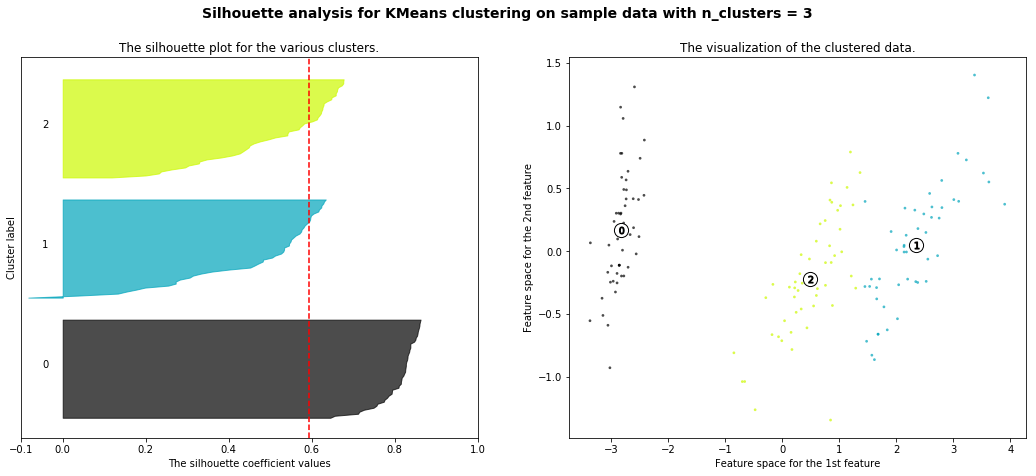

For n_clusters = 4 The average silhouette_score is : 0.5227469071779773


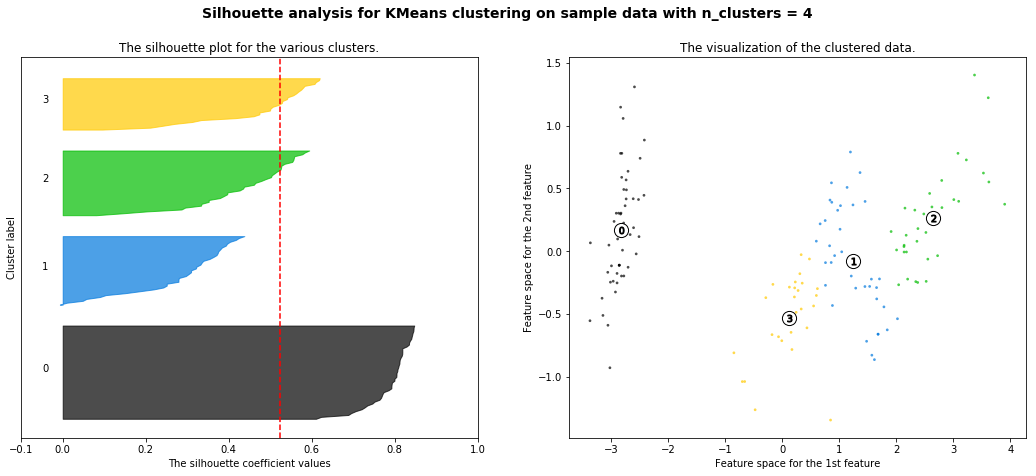

For n_clusters = 5 The average silhouette_score is : 0.5491784651508205


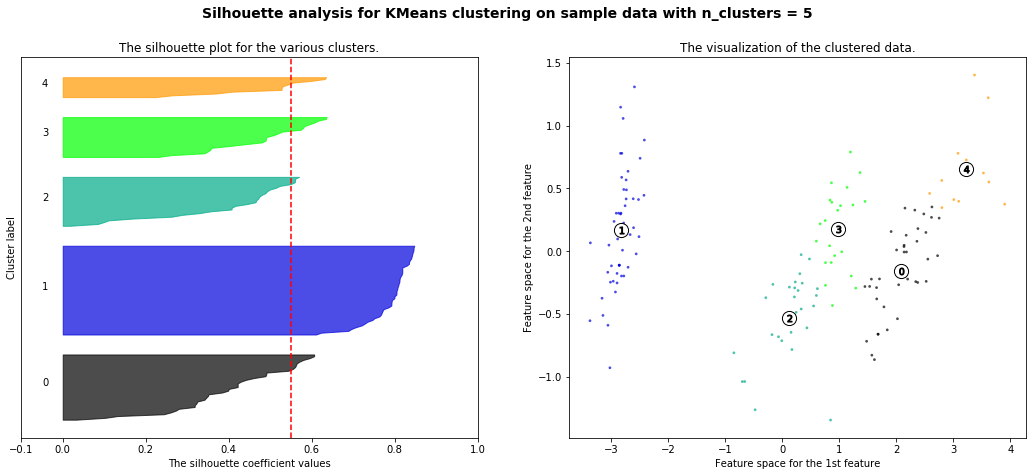

For n_clusters = 6 The average silhouette_score is : 0.4315537413823813


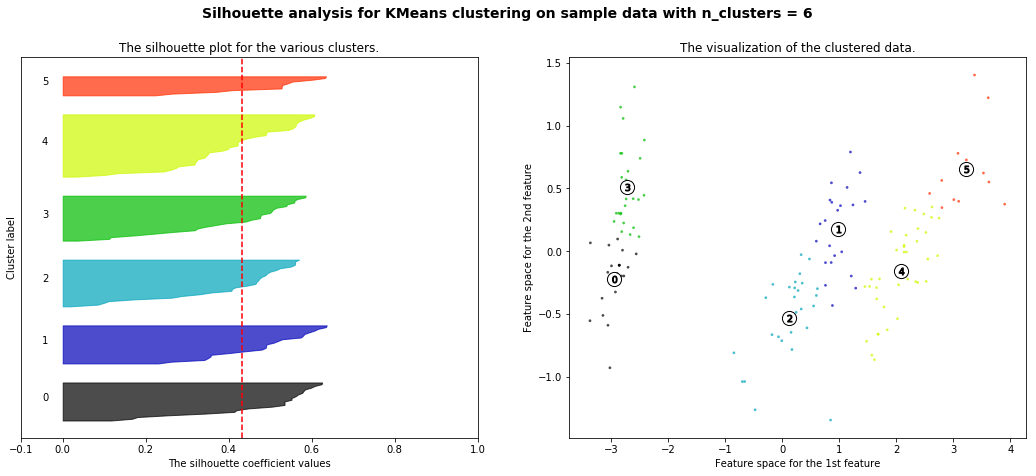

For n_clusters = 7 The average silhouette_score is : 0.43364995209337714


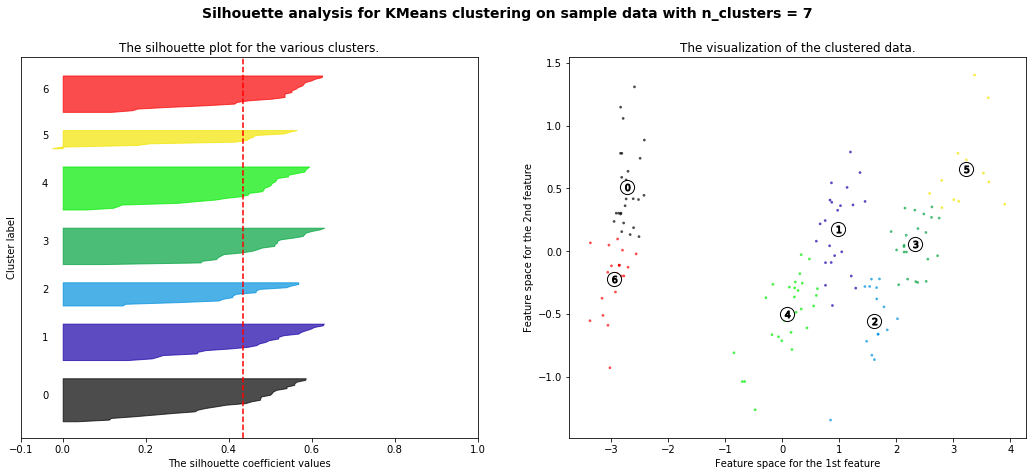

For n_clusters = 8 The average silhouette_score is : 0.43019905331151276


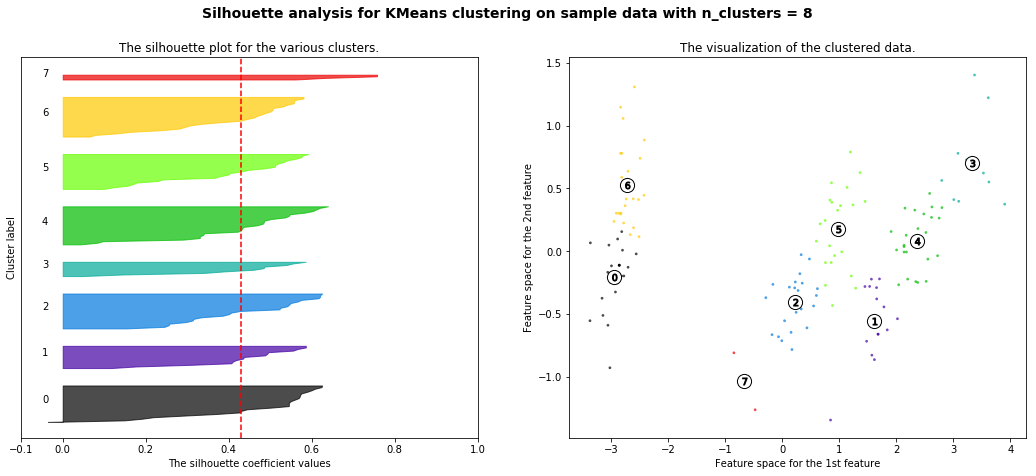

For n_clusters = 9 The average silhouette_score is : 0.418482148006092


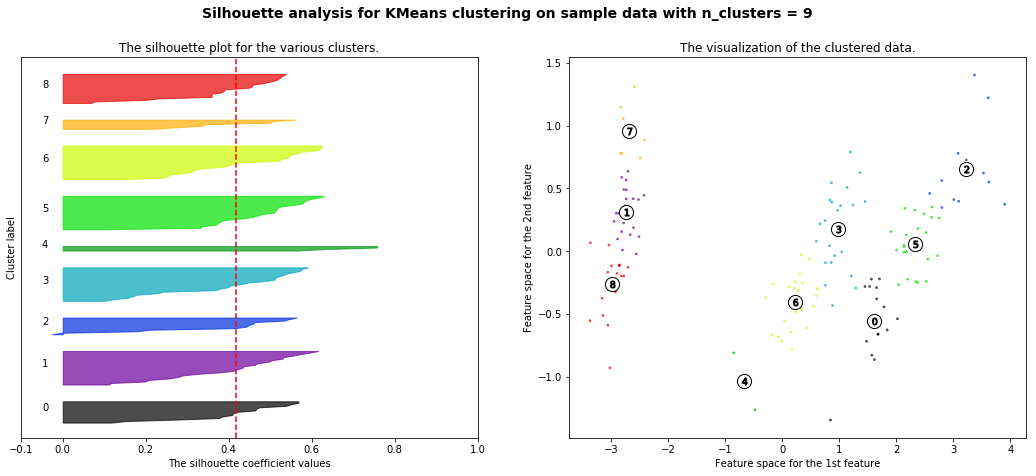

In [10]:
range_n_clusters = [2, 3, 4, 5, 6,7,8,9]
scores = []
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    scores.append(silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    #print("For n_clusters =", n_clusters,"The sample silhouette_score is :", sample_silhouette_values)
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

In [11]:
print(scores)

[0.6914512512452402, 0.5943543745049942, 0.5227469071779773, 0.5491784651508205, 0.4315537413823813, 0.43364995209337714, 0.43019905331151276, 0.418482148006092]


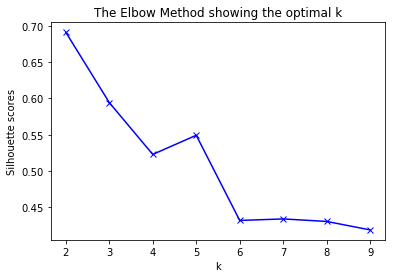

In [12]:
plt.plot(range_n_clusters,scores,'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette scores')
plt.title('The Elbow Method showing the optimal k')
plt.show()

*In graph above the optimal number of cluster is 3 because we have to choose a value after which there is a reduction in gain, This leaves us with TWO options 3 and 5. Since Silhouette value lies between [-1,1] this means higher the silhouette value better the clustering*  
*ref : http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py*

In [13]:
slope=[]
for i in range(1,8):
    print('score 1 :'+str(scores[i])+' score 2 :'+str(scores[i-1]))
    s= (scores[i]-scores[i-1])
    slope.append([i+2,s])
slope

score 1 :0.5943543745049942 score 2 :0.6914512512452402
score 1 :0.5227469071779773 score 2 :0.5943543745049942
score 1 :0.5491784651508205 score 2 :0.5227469071779773
score 1 :0.4315537413823813 score 2 :0.5491784651508205
score 1 :0.43364995209337714 score 2 :0.4315537413823813
score 1 :0.43019905331151276 score 2 :0.43364995209337714
score 1 :0.418482148006092 score 2 :0.43019905331151276


[[3, -0.09709687674024603],
 [4, -0.07160746732701684],
 [5, 0.026431557972843134],
 [6, -0.11762472376843919],
 [7, 0.0020962107109958605],
 [8, -0.0034508987818643866],
 [9, -0.011716905305420744]]

In [14]:
#chose the value after which there is a reduction in gain(rather loss)
for a in range(0,6):
    change_slope=(slope[a])[-1] - (slope[a+1])[-1]
    if change_slope < 0:
        print('Optimal Number of Clusters = '+str((slope[a][0])-1))

Optimal Number of Clusters = 2
Optimal Number of Clusters = 3
Optimal Number of Clusters = 5
